# Crop and paste images
This notebook was translated from [ImageJ Macro](https://clij.github.io/clij2-docs/md/crop_and_paste/).

It shows how  to crop and paste images in the GPU.

## Initialize GPU

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("GTX")
print("Used GPU: " + cle.get_device().name)

Used GPU: GeForce RTX 2080 Ti


## Get example data and push it to the GPU

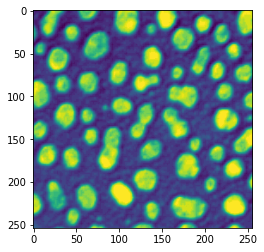

In [2]:
# load data
image = imread('https://samples.fiji.sc/blobs.png')

gpu_image = cle.push(image)

cle.imshow(gpu_image)

In [3]:
## Crop out a part of the image

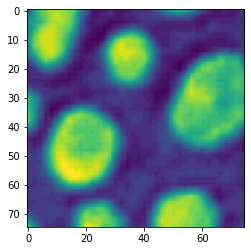

In [4]:
width = 75
height = 75
tile = cle.create([width, height])

x = 10
y = 10
cle.crop(gpu_image, tile, x, y)

cle.imshow(tile)

## Create output image
We create an empty image and make a collage by pasting the cropped image into it. We also transform the cropped image for visualisation purpose:

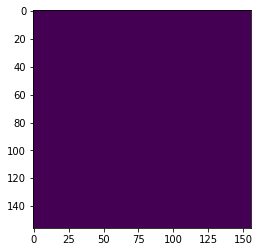

In [5]:
collage = cle.create([width * 2 + 6, height * 2 + 6])

# "white" background
cle.set(collage, 255)

cle.imshow(collage)

## Paste tiles

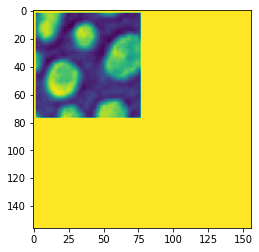

In [6]:
cle.paste(tile, collage, 2, 2)

cle.imshow(collage)

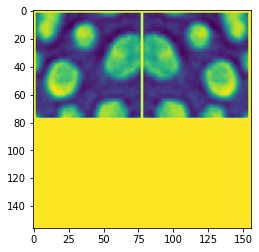

In [7]:
flip_tile = cle.flip(tile, flip_x=True, flip_y=False)
cle.paste(flip_tile, collage, width + 4, 2)

cle.imshow(collage)

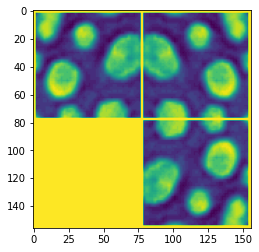

In [8]:
flip_tile = cle.flip(tile, flip_x=True, flip_y=True)
cle.paste(flip_tile, collage, width + 4, height + 4)

cle.imshow(collage)

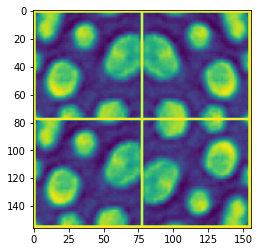

In [9]:
flip_tile = cle.flip(tile, flip_x=False, flip_y=False)
cle.paste(flip_tile, collage, 2, height + 4)

cle.imshow(collage)